In [1]:
from IPython.display import Image, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cv2 as cv
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

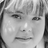

In [2]:
# Display sample image
img_path = "../Datasets/Emotions/test/neutral/im0.png"
display(Image(filename=img_path, width=200, height=300))

In [3]:
# Load class names
class_names = os.listdir("../Datasets/Emotions/train")
print("Class Names:", class_names)

Class Names: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [4]:
# Function to plot images from dataset
def plot_images(class_name, dataset_path):
    plt.figure(figsize=(15, 11))
    path = f"{dataset_path}/{class_name}"
    print(f"<< {class_name} >>")
    for i in range(1, 7):
        plt.subplot(3, 3, i)
        plt.tight_layout()
        rand_img = cv.imread(path + '/' + np.random.choice(sorted(os.listdir(path))))
        plt.imshow(rand_img)
        plt.xticks([])
        plt.yticks([])
    plt.show()

<< angry >>


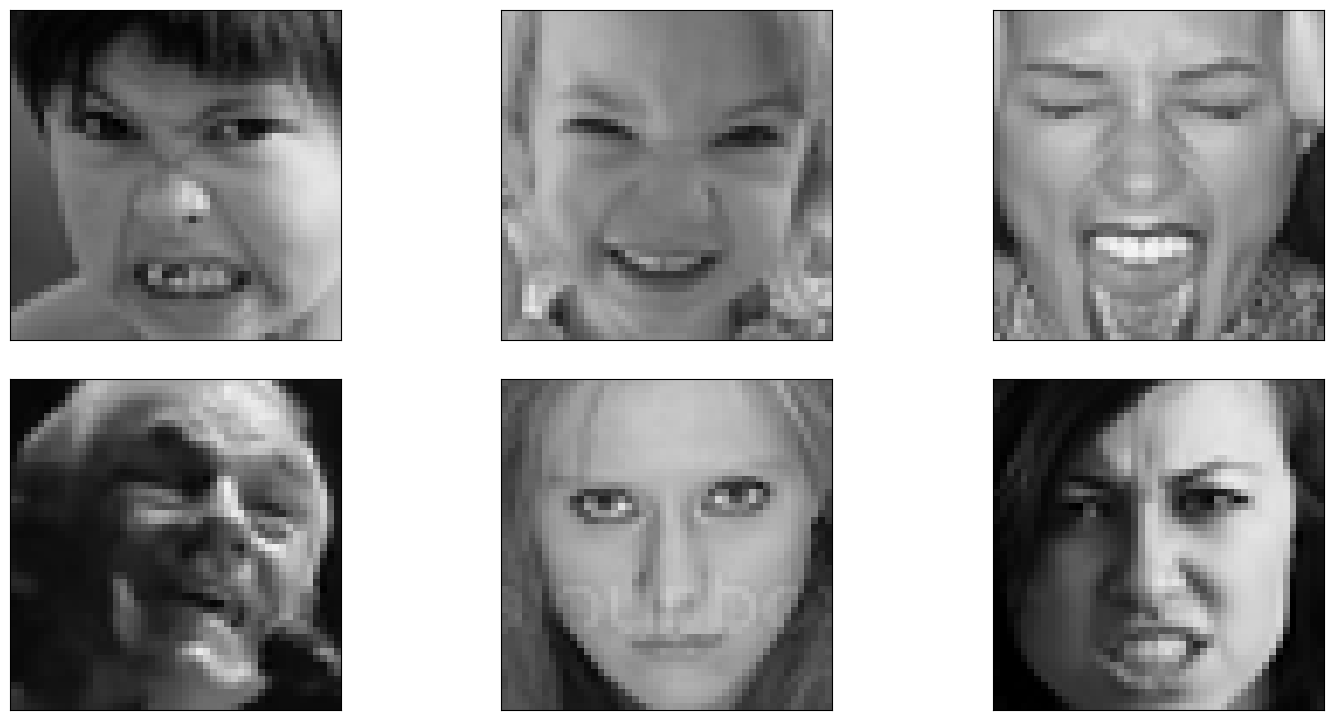

<< disgusted >>


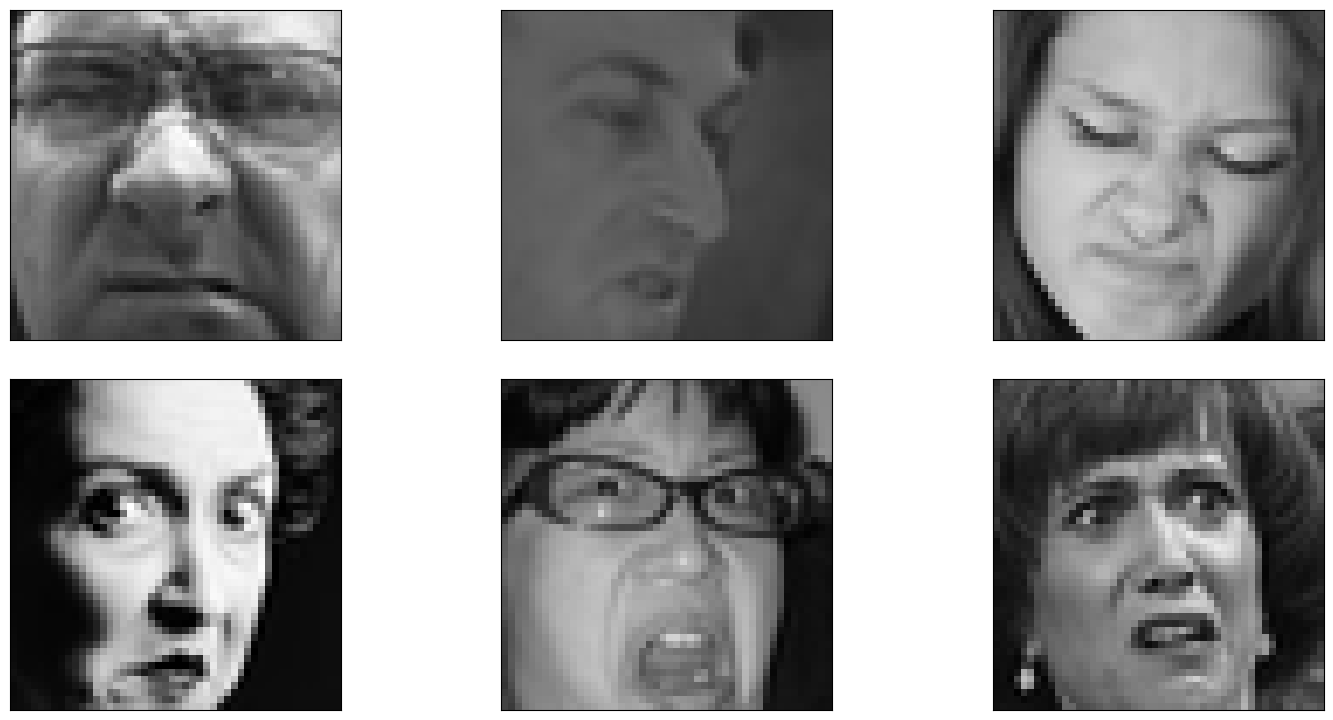

<< fearful >>


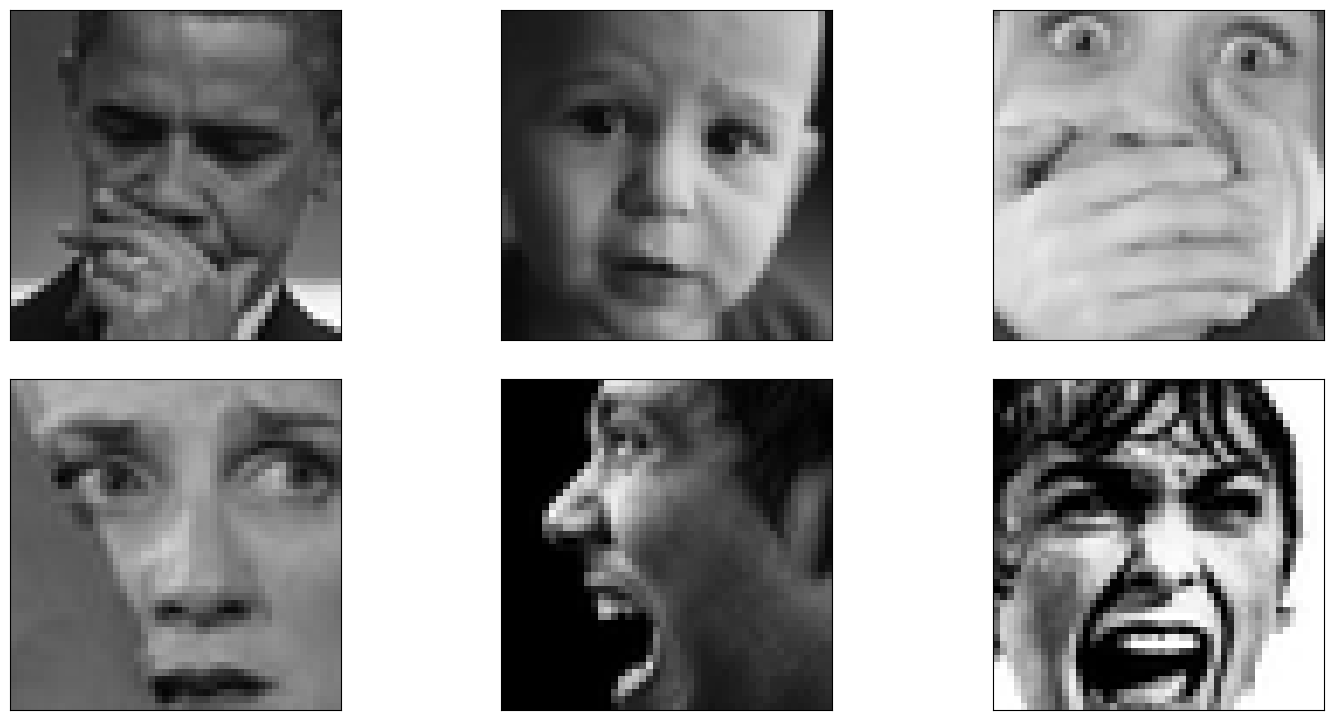

<< happy >>


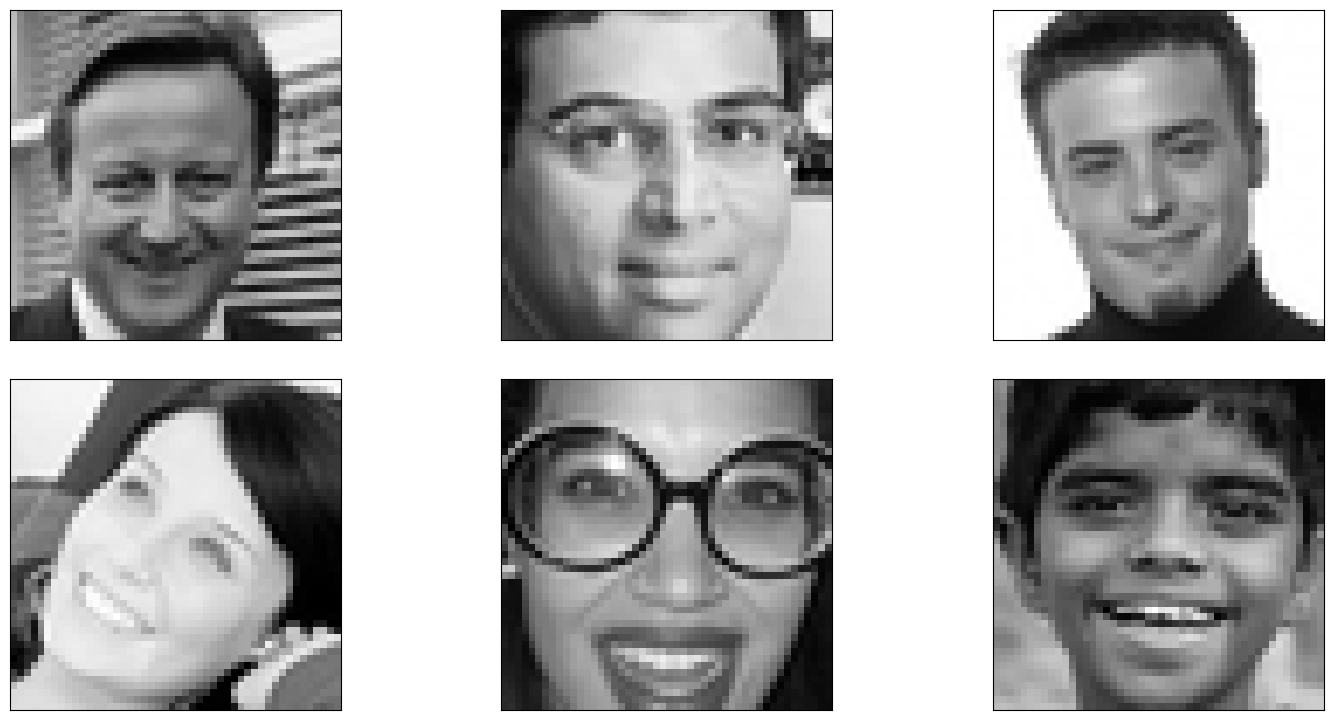

<< neutral >>


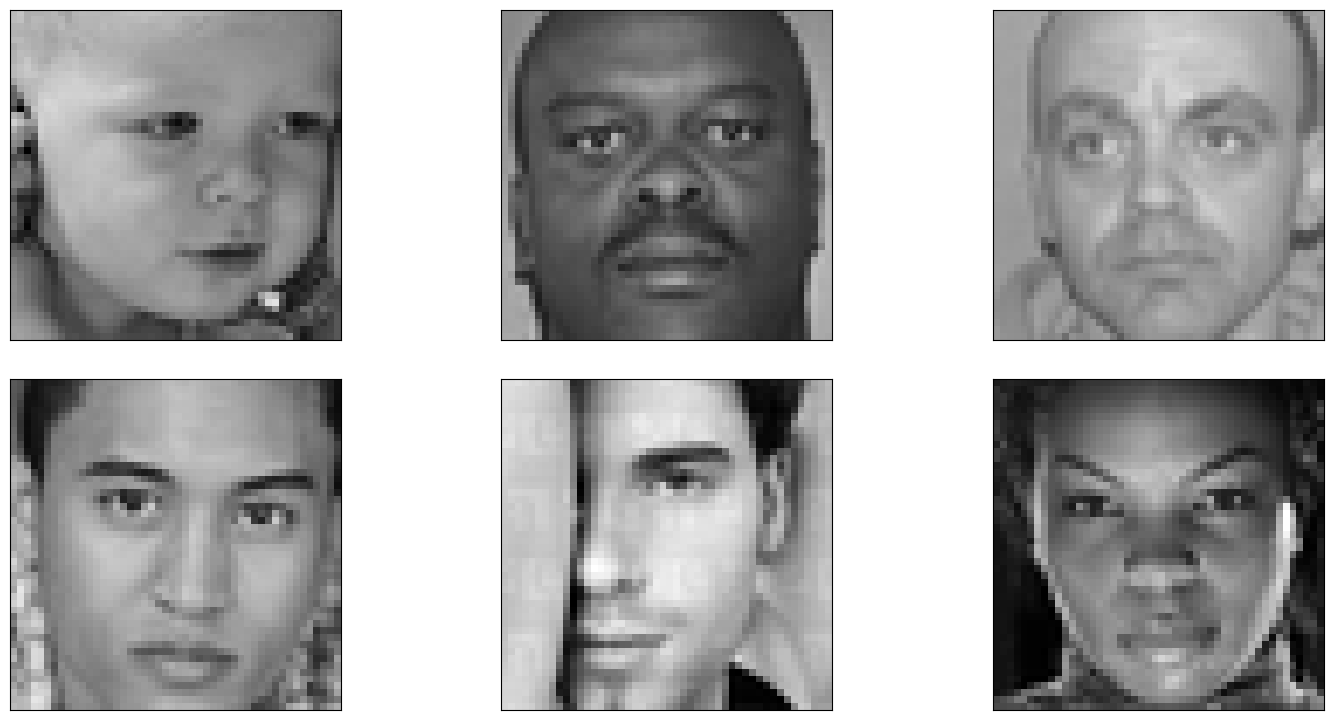

<< sad >>


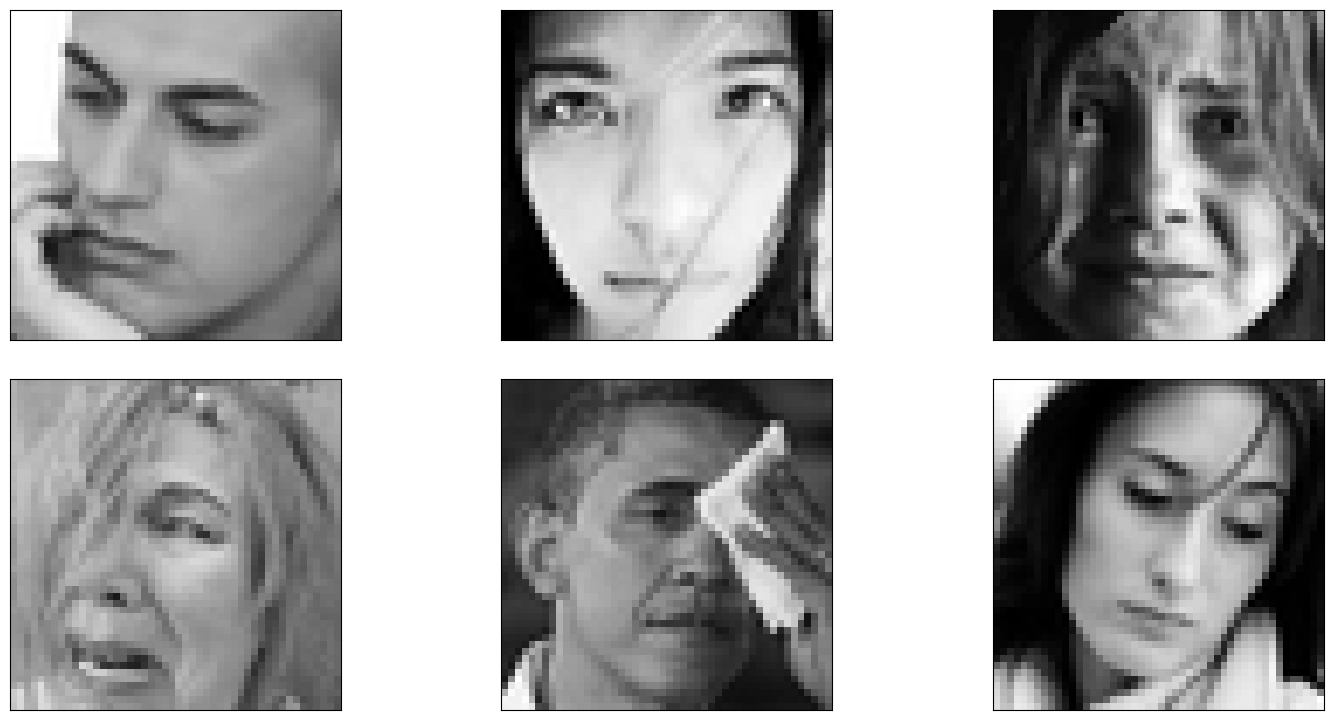

In [5]:
# Plot images for each class
train_path = "../Datasets/Emotions/train"
for class_name in class_names[:6]:
    plot_images(class_name, train_path)

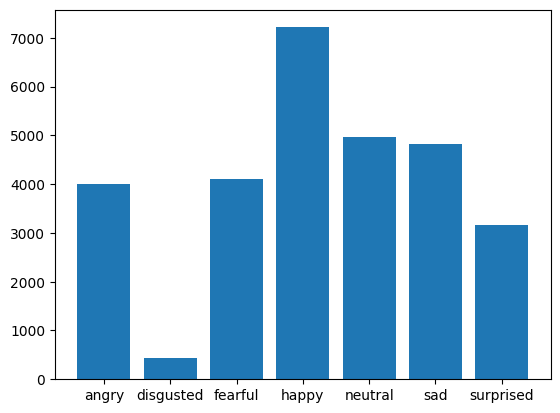

In [6]:
# Plot class distribution
train_counts = [len(os.listdir(f"{train_path}/{cls}/")) for cls in class_names]
plt.bar(class_names, train_counts)
plt.show()

In [7]:
# Image Data Generators
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    zoom_range=0.2,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Load datasets
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    directory="../Datasets/Emotions/test",
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 7178 images belonging to 7 classes.


In [10]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(225, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [11]:
# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train Model
history = model.fit(
    train_generator,
    epochs=120,
    batch_size=32
)

Epoch 1/120
898/898 [==============================] - 247s 265ms/step - loss: 1.9395 - accuracy: 0.2395
Epoch 2/120
898/898 [==============================] - 215s 239ms/step - loss: 1.6783 - accuracy: 0.3416
Epoch 3/120
898/898 [==============================] - 28s 31ms/step - loss: 1.4621 - accuracy: 0.4361
Epoch 4/120
898/898 [==============================] - 28s 32ms/step - loss: 1.3480 - accuracy: 0.4839
Epoch 5/120
898/898 [==============================] - 29s 32ms/step - loss: 1.2754 - accuracy: 0.5146
Epoch 6/120
898/898 [==============================] - 29s 32ms/step - loss: 1.2254 - accuracy: 0.5373
Epoch 7/120
898/898 [==============================] - 29s 32ms/step - loss: 1.1906 - accuracy: 0.5502
Epoch 8/120
898/898 [==============================] - 29s 32ms/step - loss: 1.1654 - accuracy: 0.5600
Epoch 9/120
898/898 [==============================] - 29s 32ms/step - loss: 1.1399 - accuracy: 0.5715
Epoch 10/120
898/898 [==============================] - 30s 33ms/step

In [13]:
# Evaluate Model
model.evaluate(test_generator)

225/225 [==============================] - 57s 244ms/step - loss: 1.0040 - accuracy: 0.6861


[1.0040242671966553, 0.6861242651939392]

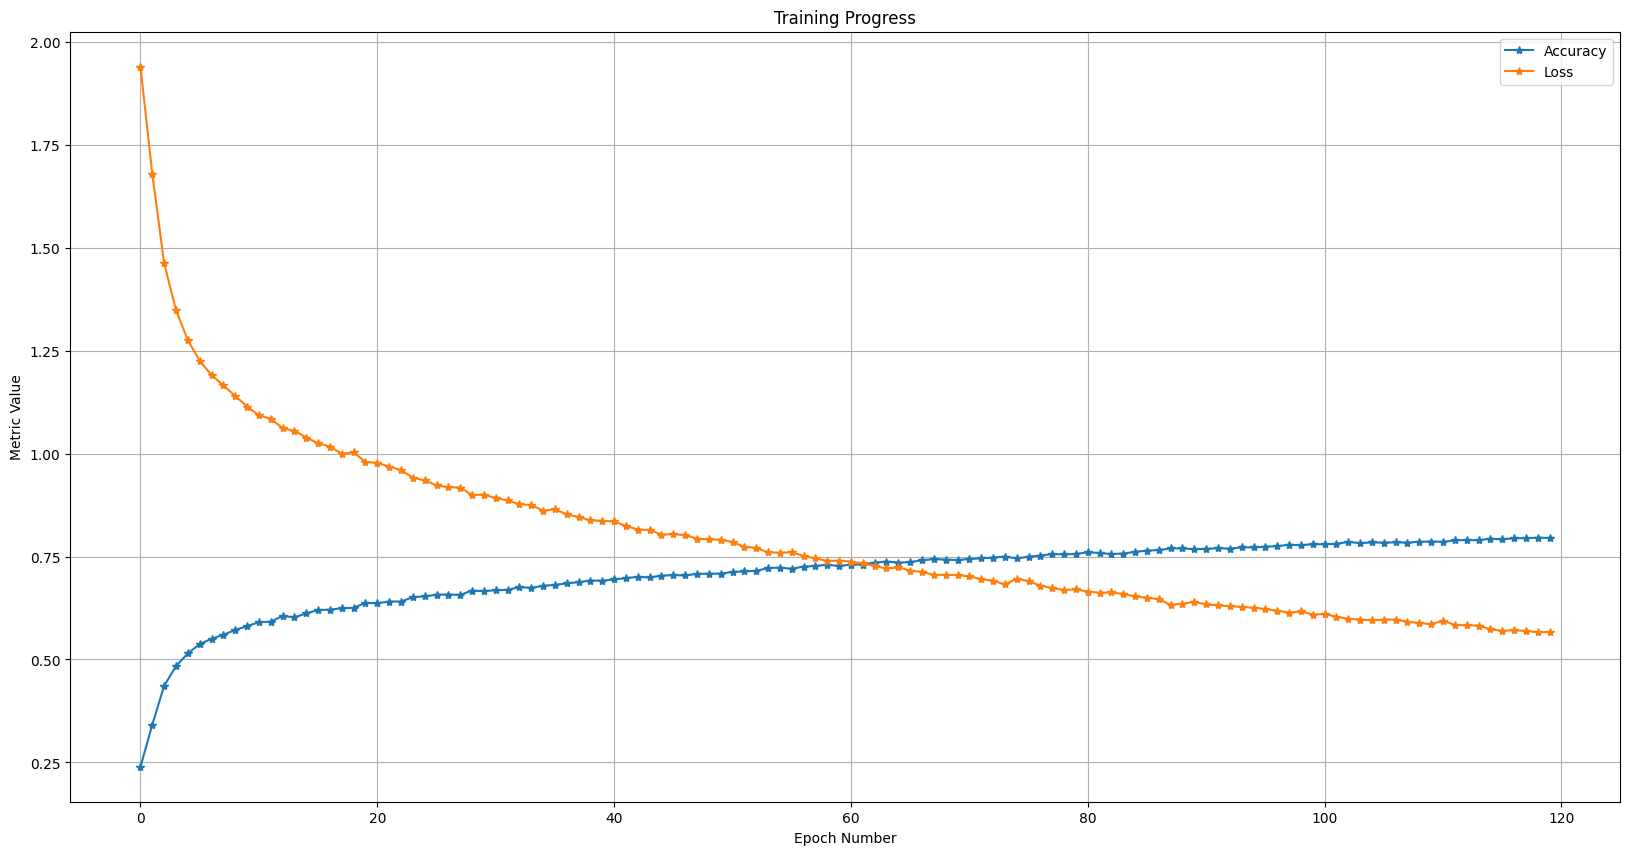

In [14]:
# Plot Training History
# plt.style.use('seaborn-deep')
plt.figure(figsize=(20, 10))
plt.plot(history.history['accuracy'], marker="*", label="Accuracy")
plt.plot(history.history['loss'], marker="*", label="Loss")
plt.grid(True)
plt.title("Training Progress")
plt.xlabel("Epoch Number")
plt.ylabel("Metric Value")
plt.legend()
plt.show()

In [15]:
model.save("../Models/emotionModel3.h5")

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import os
import cv2 as cv

def predict_emotions(model_path, test_path, class_names, num_images=10):
    # Load trained model
    model = load_model(model_path)
    
    # Get test images
    test_images = []
    actual_labels = []
    
    for class_name in class_names:
        class_path = os.path.join(test_path, class_name)
        images = os.listdir(class_path)
        
        for img_name in np.random.choice(images, num_images // len(class_names), replace=False):
            img_path = os.path.join(class_path, img_name)
            test_images.append(img_path)
            actual_labels.append(class_name)
    
    # Predict emotions
    plt.figure(figsize=(15, 10))
    
    for i, img_path in enumerate(test_images[:num_images]):
        img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
        img = cv.resize(img, (48, 48))
        img_array = img.reshape(1, 48, 48, 1) / 255.0
        
        prediction = model.predict(img_array)
        predicted_label = class_names[np.argmax(prediction)]
        
        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 26ms/step


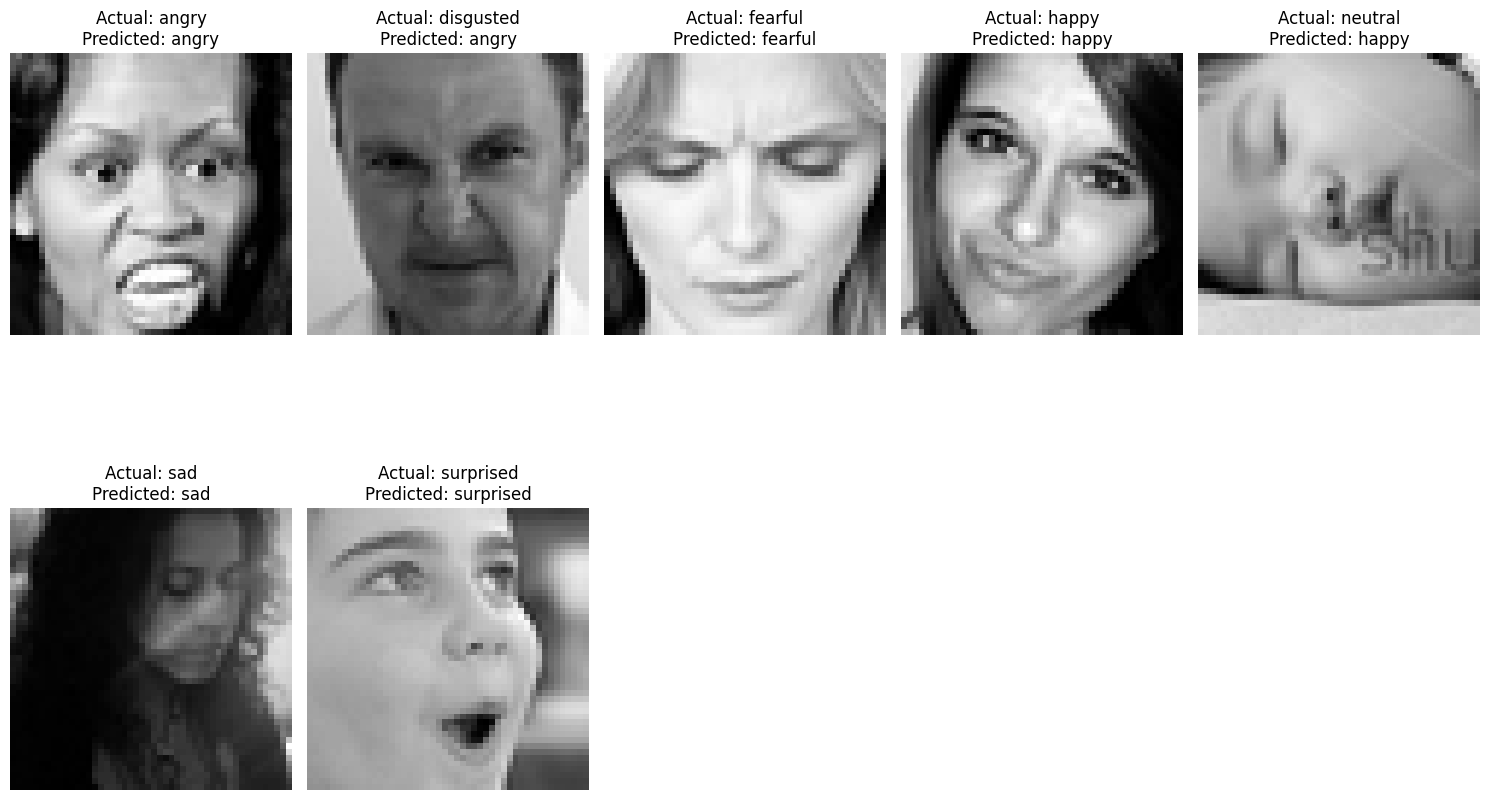

In [17]:

# Define paths
model_path = "../Models/emotionModel3.h5"
test_path = "../Datasets/Emotions/test"
class_names = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Run the prediction function
predict_emotions(model_path, test_path, class_names)